## Task
Explore basic statistical methods in SciPy

## Notebook Summary
* Generate random variables
* Get properties of random variables
* Hypothesis testing
* Non-parametrics

## References
* *Numerical Python*, Robert Johansson, APress, 2015


In [10]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version =', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import numpy as np
print 'numpy.version =', np.__version__
import scipy
from scipy import stats
print 'scipy.version =', scipy.__version__

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
print 'matplotlib.version =', mpl.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__


python.version = 2.7.10
ipython.version = (5, 1, 0, '')
numpy.version = 1.11.2
scipy.version = 0.18.1
matplotlib.version = 1.5.3
seaborn.version =  0.7.1


In [94]:
# Create random variable
X = stats.norm(0,1)

# Get properties of this random var
print '----- mean, std, var'
X.mean(), stats.norm.mean()
X.std(), stats.norm.std()
X.var(), stats.norm.var()
X.stats(), stats.norm.stats() # mean var for Normal r.v.

print '----- First 10 moments'
[X.moment(n) for n in range(10)]

print '----- PDF, CDF, SF'
X.pdf([-1,0,1,2]) # pdf of input values
X.cdf([-1,0,1,2]) # cdf of input values
X.sf([-1,0,1,2]) # survival function := 1 - cdf

print '----- Intervals'
X.interval(0.95) # get middle 95% interval
X.interval(0.5)
X.interval(0.99)

print '----- Generate random variates'
X.rvs(10)

print '----- Get max likelihood estimate'
samples = stats.t(5).rvs(1000) # sample from t-dist
loc, scale = stats.norm.fit(samples)
print 'loc={}, scale={}'.format(loc, scale) # fit a Normal dist. to samples


----- mean, std, var


(0.0, 0.0)

(1.0, 1.0)

(1.0, 1.0)

((array(0.0), array(1.0)), (array(0.0), array(1.0)))

----- First 10 moments


[1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 -1.5022529663236356e-14,
 15.000000000895332,
 -1.7549405358423121e-13,
 104.99999991038254,
 -1.83633236869274e-12]

----- PDF, CDF, SF


array([ 0.24197072,  0.39894228,  0.24197072,  0.05399097])

array([ 0.15865525,  0.5       ,  0.84134475,  0.97724987])

array([ 0.84134475,  0.5       ,  0.15865525,  0.02275013])

----- Intervals


(-1.959963984540054, 1.959963984540054)

(-0.67448975019608171, 0.67448975019608171)

(-2.5758293035489004, 2.5758293035489004)

----- Generate random variates


array([-0.34686722, -0.20561581, -0.16798614,  1.32486625, -1.32399837,
       -2.17515326, -1.34654847, -0.78111341, -0.28806019, -0.128903  ])

----- Get max likelihood estimate
loc=-0.00678129235171, scale=1.28611479719


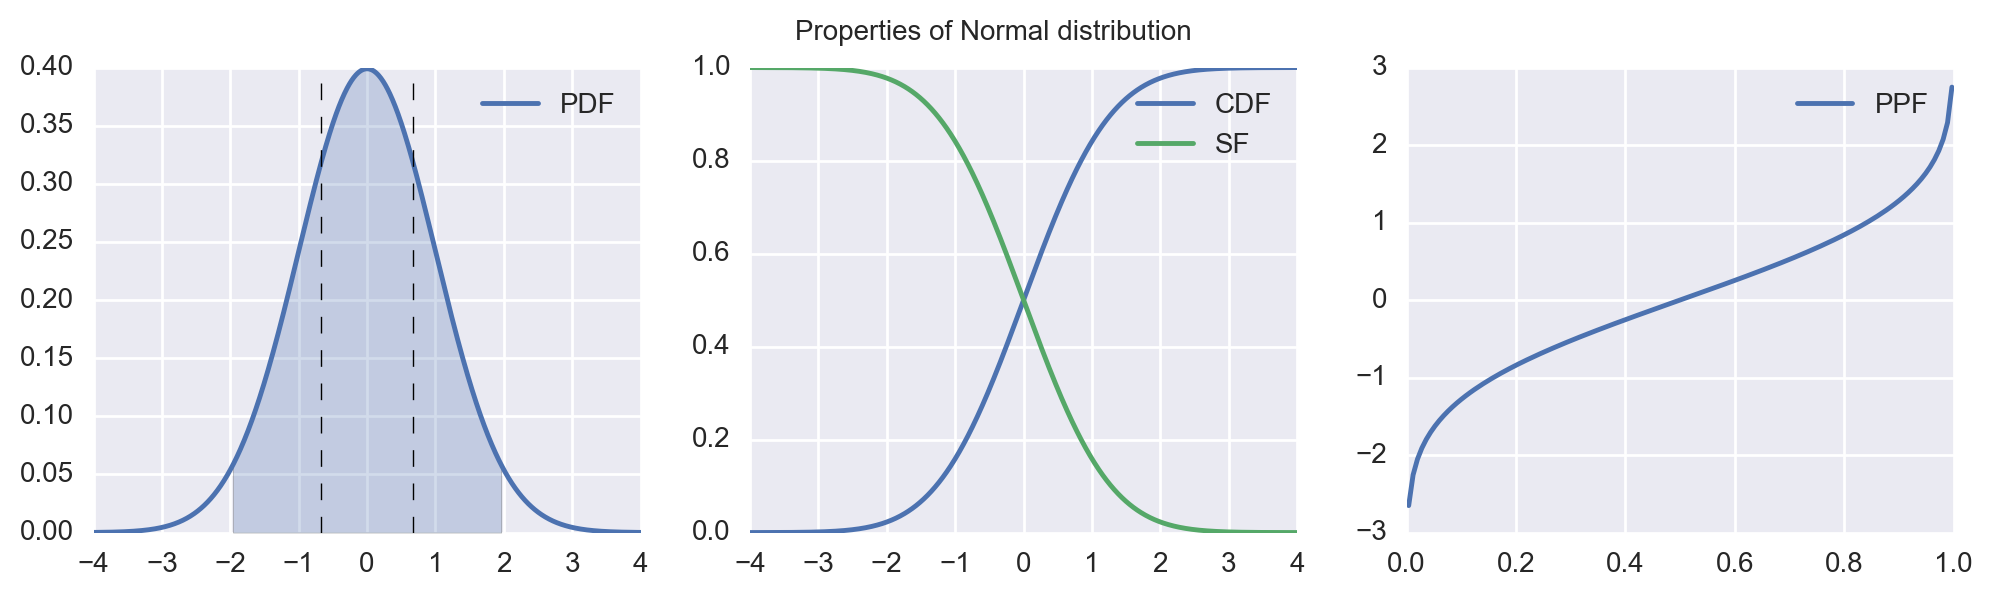

In [95]:
# plot Normal(0,1) distribution and highlight middle 50% and 95% of distribution

fig, ax = plt.subplots(1,3, figsize=(12,3));

X = stats.norm(0,1)
support = np.linspace(-4, 4, 1000)
ax[0].plot(support, X.pdf(support), label="PDF");
ax[1].plot(support, X.cdf(support), label="CDF");
ax[1].plot(support, X.sf(support), label="SF");
ax[2].plot(support, X.ppf(support), label="PPF");

mn, mx = X.interval(0.95)
support95 = np.linspace(mn, mx, 1000)
ax[0].fill_between(support95, X.pdf(support95), alpha=0.25)

mn, mx = X.interval(0.5)
ax[0].axvline(x=mn, linestyle='--', linewidth=0.5, color='k')
ax[0].axvline(x=mx, linestyle='--', linewidth=0.5, color='k')

plt.suptitle('Properties of Normal distribution')

for a in ax:
    a.legend()
